In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images = tf.keras.utils.normalize(train_images, axis=1)
test_images = tf.keras.utils.normalize(test_images, axis=1)

In [17]:
type(train_images[0])

numpy.ndarray

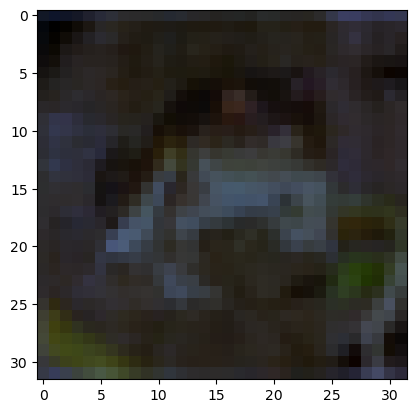

In [15]:
import matplotlib.pyplot as plt

# Get the first element of the array
image_array = train_images[0]

# Display the image
plt.imshow(image_array)
plt.show()

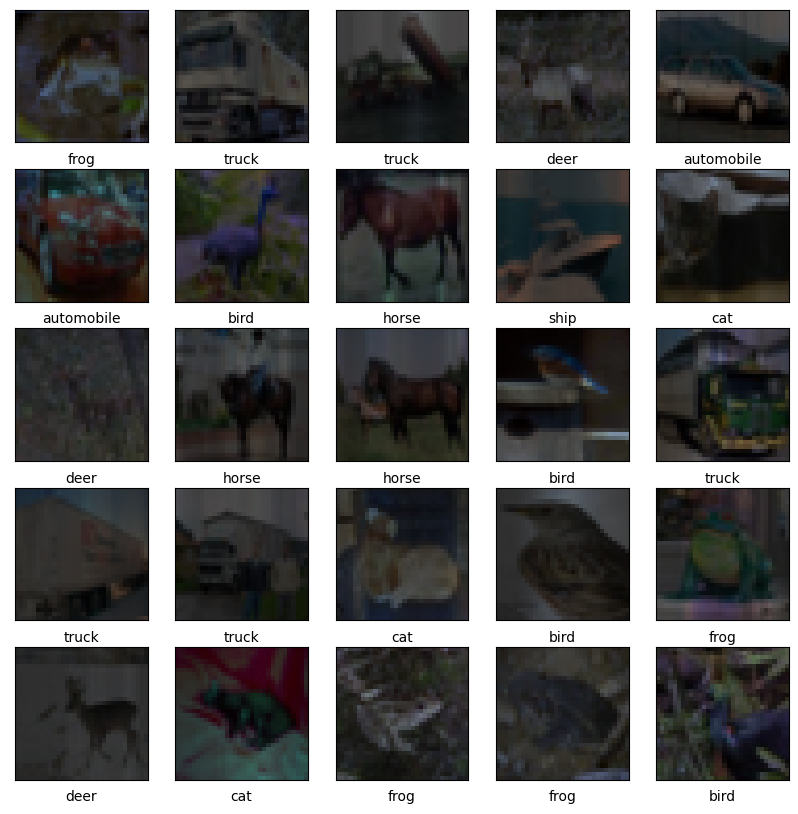

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 23s 14ms/step - loss: 1.7059 - accuracy: 0.3788 - val_loss: 1.4229 - val_accuracy: 0.4859
Epoch 2/10
1563/1563 [==============================] - 23s 14ms/step - loss: 1.3425 - accuracy: 0.5210 - val_loss: 1.2864 - val_accuracy: 0.5522
Epoch 3/10
1563/1563 [==============================] - 23s 14ms/step - loss: 1.1715 - accuracy: 0.5882 - val_loss: 1.1437 - val_accuracy: 0.6058
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0705 - accuracy: 0.6243 - val_loss: 1.0622 - val_accuracy: 0.6287
Epoch 5/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.0040 - accuracy: 0.6473 - val_loss: 1.0467 - val_accuracy: 0.6337
Epoch 6/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9454 - accuracy: 0.6705 - val_loss: 1.0586 - val_accuracy: 0.6372
Epoch 7/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.8888 - accuracy: 0.6891 - val_loss: 0.9800 -

In [8]:
predictions = model.predict([test_images])

313/313 [==============================] - 3s 9ms/step


313/313 - 2s - loss: 0.9333 - accuracy: 0.6826 - 2s/epoch - 5ms/step


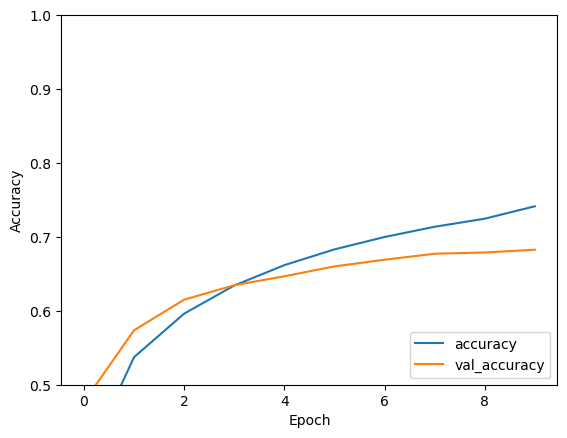

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

Predicted output: bird 
Real output: cat


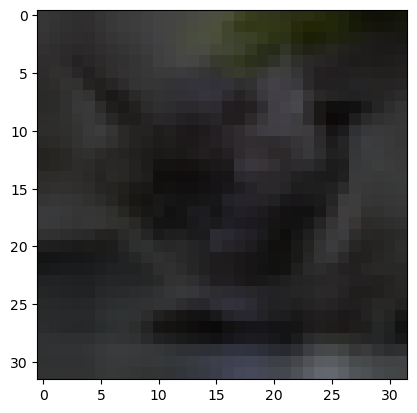

In [15]:
import numpy as np

index = 187

print("Predicted output: {} \nReal output: {}".format(class_names[np.argmax(predictions[index])],class_names[test_labels[index][0]]))
plt.imshow(test_images[index])